# Wales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
deaths = pd.read_csv('sent_and_response_4001_corrected_area.csv')

In [ ]:
display(deaths.columns)

Index(['Unnamed: 0', 'date_of_report', 'ref', 'deceased_name', 'coroner_name',
       'coroner_area', 'category', 'this_report_is_being_sent_to', 'url',
       'sent_count', 'pdf_count', 'responses', 'yet_to_receive',
       'response_rate', 'date_time', 'late_time', 'at_least_one_response',
       'late', 'expected_number_bool', 'corrected_area'],
      dtype='object')

In [ ]:
deaths = deaths[['date_time', 'ref', 'corrected_area']]

In [ ]:

deaths['year'] = deaths['date_time'].str[:4]

In [ ]:
print(deaths[deaths['year'].isna()].shape)

(3, 4)


3 NaNs

In [ ]:
deaths = deaths[deaths['year'].notna()]

In [ ]:
display(deaths.head())
print(deaths.shape)

,date_time,ref,corrected_area,year
0,2022-03-18,2022-0089,Dorset,2022
1,2020-01-27,2020-0124,Inner North London,2020
2,2021-12-17,2021-0433,Manchester North,2021
3,2021-11-03,2021-0362,Avon,2021
4,2017-07-21,2017-0330A,West Yorkshire (Western),2017


(3998, 4)


In [ ]:
wales = ['North West Wales', 'Ceredigion', 'Carmarthenshire and Pembrokeshire', 'Swansea and Neath Port Talbot', 'South Wales Central', 'North Wales (East & Central)', 'Gwent']

In [ ]:
wales_death = pd.DataFrame()
for area in wales: 
  wales_death = wales_death.append(deaths[deaths['corrected_area']==area], ignore_index = True)
england_death = deaths.merge(wales_death, on='corrected_area', 
                   how='left', indicator=True)
england_death = england_death[england_death['_merge']=='left_only']
england_death.drop(['date_time_y', 'ref_y', 'year_y',	'_merge'], axis = 1, inplace = True)
england_death.rename(columns = {'date_time_x':'date_time', 'ref_x':'ref', 'year_x':'year'}, inplace = True)

In [ ]:
display(wales_death)

,date_time,ref,corrected_area,year
0,2016-01-15,2016-0022,North West Wales,2016
1,2017-10-05,2017-0280,North West Wales,2017
2,2015-11-11,2015-0433,North West Wales,2015
3,2021-11-10,2021-0378,North West Wales,2021
4,2021-12-07,2021-0413,North West Wales,2021
...,...,...,...,...
175,2014-02-20,2014-0068,Gwent,2014
176,2014-01-23,2014-0032,Gwent,2014
177,2022-01-14,2022-0010,Gwent,2022
178,2022-01-05,2022-0001,Gwent,2022


In [ ]:
year_england = england_death.groupby(['year']).count()
year_england.reset_index(inplace = True)
year_england = year_england[['year', 'ref']]
year_england.rename(columns = {'ref': 'count'}, inplace = True)
year_england['year'] = year_england['year'].astype(int)

In [ ]:
display(year_england)

,year,count
0,2013,174
1,2014,542
2,2015,408
3,2016,450
4,2017,417
5,2018,375
6,2019,501
7,2020,299
8,2021,415
9,2022,137


In [ ]:
year_wales = wales_death.groupby(['year']).count()

In [ ]:
year_wales.reset_index(inplace = True)
year_wales = year_wales[['year', 'ref']]
year_wales.rename(columns = {'ref': 'count'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
display(year_wales)

,year,count
0,2013,6
1,2014,25
2,2015,26
3,2016,22
4,2017,23
5,2018,12
6,2019,25
7,2020,12
8,2021,18
9,2022,8


In [ ]:
year_wales['year'] = year_wales['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Plot England and Wales together to see if Wales is underreported

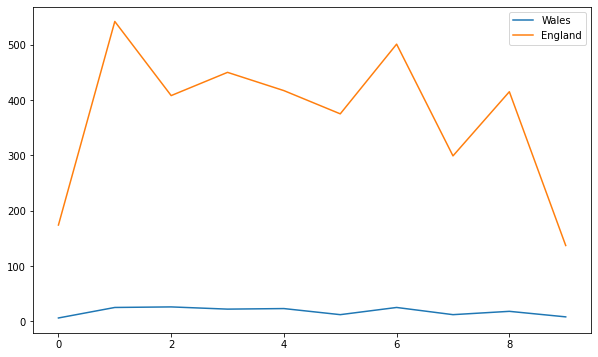

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(10), year_wales['count'], label = 'Wales')
plt.plot(range(10), year_england['count'], label = 'England')
plt.legend()

#Need to scale Wales and England by their population to obtain PFDs per 
#100,000 

Download ONS population data from 

https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/timeseries/wapop/pop

https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/timeseries/enpop/pop

In [ ]:
en_pop = pd.read_csv('England_pop.csv')
wa_pop = pd.read_csv('Wales_pop.csv')
en_pop = en_pop.loc[49:]
wa_pop = wa_pop.loc[49:]

FileNotFoundError: ignored

Add census data from 2021 and guess 2022 population by the trend

https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationandhouseholdestimatesenglandandwales/census2021

In [ ]:
print(type(wa_pop.loc[56, 'Wales population mid-year estimate']))

In [ ]:
en_pop.loc[len(en_pop.index)] = ['2021', '56489800']
wa_pop.loc[len(wa_pop.index)] = ['2021', '3107500']
en_pop.loc[len(en_pop.index)] = ['2022', '56489800']
wa_pop.loc[len(wa_pop.index)] = ['2022', '3107500']
en_pop['England population mid-year estimate'] = en_pop['England population mid-year estimate'].astype(int)
en_pop['Title'] = en_pop['Title'].astype(int)
wa_pop['Wales population mid-year estimate'] = wa_pop['Wales population mid-year estimate'].astype(int)
wa_pop['Title'] = wa_pop['Title'].astype(int)

In [ ]:
year_wales.loc[:8, 'Wales population mid-year estimate'] = year_wales.loc[9:, 'Wales population mid-year estimate']

# Start from here with PFD and ONS dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
year_wales = pd.DataFrame({'year': range(2013, 2023), 'count': [6, 25, 26, 22, 23, 12, 25, 12, 18, 8], 'Wales pop': [3082400, 3092000, 3099100, 3113200, 3125200, 3138600, 3152900, 3170000, 3107500, 3107500]})

In [ ]:
year_en = pd.DataFrame({'year': range(2013, 2023), 'count': [174, 542, 408, 450, 417, 375, 501, 299, 415, 137], 'England pop': [53865800, 54316600, 54786300, 55268100, 55619400, 55977200, 56287000, 56550000, 56489800, 56489800]})

In [ ]:
display(year_wales)
display(year_en)

,year,count,Wales pop
0,2013,6,3082400
1,2014,25,3092000
2,2015,26,3099100
3,2016,22,3113200
4,2017,23,3125200
5,2018,12,3138600
6,2019,25,3152900
7,2020,12,3170000
8,2021,18,3107500
9,2022,8,3107500


,year,count,England pop
0,2013,174,53865800
1,2014,542,54316600
2,2015,408,54786300
3,2016,450,55268100
4,2017,417,55619400
5,2018,375,55977200
6,2019,501,56287000
7,2020,299,56550000
8,2021,415,56489800
9,2022,137,56489800


In [ ]:
year_wales['scaled count'] = year_wales['count']/year_wales['Wales pop']*100000

In [ ]:
year_en['scaled count'] = year_en['count']/year_en['England pop']*100000

In [ ]:
print(year_wales['scaled count'].mean())
print(year_en['scaled count'].mean())

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(2013, 2023), year_wales['scaled count'], label = 'Wales')
plt.plot(range(2013, 2023), year_en['scaled count'], label = 'England')
plt.legend()
plt.xlabel('Years (2013-2022)')
plt.ylabel('Number of PFDs per 100,000')
plt.savefig('PFD_england_wales.png')
plt.show()

Assume 2022 population is the same as 2021. Conclusion: Wales deaths are underreported

Save csv of scaled_count

In [ ]:
en_wa_scaled_pfd = pd.DataFrame({'Years': range(2013, 2023), 'England PFD':year_en['count'], 'England population':year_en['England pop'], 'England PFD (per 100,000)': year_en['scaled count'], 'Wales PFD': year_wales['count'], 'Wales population':year_wales['Wales pop'], 'Wale PFD (per 100,000)': year_wales['scaled count']})

In [ ]:
display(en_wa_scaled_pfd)

,Years,England PFD,England population,"England PFD (per 100,000)",Wales PFD,Wales population,"Wale PFD (per 100,000)"
0,2013,174,53865800,0.323025,6,3082400,0.194654
1,2014,542,54316600,0.997853,25,3092000,0.808538
2,2015,408,54786300,0.744712,26,3099100,0.838953
3,2016,450,55268100,0.814213,22,3113200,0.706668
4,2017,417,55619400,0.749738,23,3125200,0.735953
5,2018,375,55977200,0.669916,12,3138600,0.382336
6,2019,501,56287000,0.890081,25,3152900,0.792921
7,2020,299,56550000,0.528736,12,3170000,0.378549
8,2021,415,56489800,0.734646,18,3107500,0.579244
9,2022,137,56489800,0.242522,8,3107500,0.257442


In [ ]:
en_wa_scaled_pfd.to_csv('en_wa_pfd_pop.csv')

Find the ratio between Wales and England PFDs

In [ ]:
ratio = year_wales['scaled count']/year_en['scaled count']
plt.figure(figsize = (10, 6))
plt.plot(range(2013, 2023), ratio)

Find the average ratio

In [ ]:
average_ratio = ratio.mean()
print(average_ratio)
# Wales/England

#Simple plot of Wales death

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(range(10), year_wales['count'])
plt.xlabel('Years (2013-2022)')
plt.ylabel('Number of PFDs')
plt.xticks(ticks = range(10), labels=range(2013, 2023))
plt.axvline(x=5.5, color = 'r')
plt.savefig('wales_new_category.png')
plt.show()

# Look at England and Wales data from ONS

https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/avoidablemortalityintheuk

Looking at ONS: https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/bulletins/avoidablemortalityinenglandandwales/2019

There were no significant increase in avoidable mortality (though avoidable mortality != preventable mortality). This suggests that maybe introducing a new category influences report quantity by a lot. 

1. Need to look at ONS stats in detail to find out how many is preventable
2. What about quality of report? 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
preventable = pd.DataFrame(pd.read_excel("ons_avoidable_2020.xlsx"))

Unnamed: 55 - 2014

In [ ]:
display(preventable['Unnamed: 79'])

4      175.4
5      204.4
6        NaN
7      230.8
8      222.1
       ...  
491    113.3
492    153.3
493    163.8
494    148.2
495    126.6
Name: Unnamed: 79, Length: 492, dtype: object

In [ ]:
preventable = preventable.loc[4:, :]

In [ ]:
preventable_df = preventable[preventable['Unnamed: 2']=='England']
preventable_df = preventable_df.append(preventable[preventable['Unnamed: 2']=='Wales'], ignore_index = True)

In [ ]:
preventable_df.rename(columns = {'Table 3: Age-standardised preventable mortality rates by Clinical Commissioning Groups (CCGs) in England and Health Boards in Wales by sex, 2001 to 2020 [note 1],[note 2],[note 3],[note 4],[note 5],[note 6]': 'Sex'}, inplace = True)

In [ ]:
column_dict = {}
for i in range(7): 
  column_dict['Unnamed: {}'.format(4*i+3+13*4)] = i + 2014
print(column_dict)

{'Unnamed: 55': 2014, 'Unnamed: 59': 2015, 'Unnamed: 63': 2016, 'Unnamed: 67': 2017, 'Unnamed: 71': 2018, 'Unnamed: 75': 2019, 'Unnamed: 79': 2020}


In [ ]:
preventable_df.rename(columns=column_dict, inplace = True)

In [ ]:
preventable_df = preventable_df[range(2014, 2021)]
preventable_df.drop([1, 2, 4, 5], inplace = True)
preventable_df = preventable_df.transpose()

preventable_df.rename(columns = {0: 'England', 3: 'Wales'}, inplace = True)
preventable_df.reset_index(inplace = True)
preventable_df.rename(columns = {'index': 'Year'}, inplace = True)

,Sex,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 73,Unnamed: 74,2019,Unnamed: 76,Unnamed: 77,Unnamed: 78,2020,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,Persons,E92000001,England,200,198.5,201.4,76546,194.5,193.1,195.9,...,144.6,69728.5,140.6,139.6,141.7,68961,175.4,174.3,176.6,86668.5
1,Males,E92000001,England,277.4,275,279.9,51186.5,269.5,267.1,271.9,...,192.3,45219.5,185.8,184.1,187.6,44494.5,233.8,231.8,235.7,56288
2,Females,E92000001,England,128.3,126.7,129.9,25359.5,124.8,123.2,126.3,...,99.7,24509,97.4,96.2,98.6,24466.5,119.8,118.5,121.2,30380.5
3,Persons,W92000004,Wales,223.1,217.1,229.1,5330.5,217.2,211.3,223.1,...,173.4,4975,162.7,158.1,167.3,4855.5,189.8,184.9,194.8,5709.5
4,Males,W92000004,Wales,302.5,292.4,312.6,3468.5,297.1,287.1,307,...,227.6,3147.5,215.1,207.5,222.7,3121.5,246.5,238.4,254.6,3602
5,Females,W92000004,Wales,150,143.2,156.8,1862,143.2,136.6,149.9,...,125.3,1827.5,112.7,107.4,118.1,1734,135.9,130.1,141.8,2107.5


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
display(preventable_df)

,Year,England,Wales
0,2014,147.6,162
1,2015,146.7,169.7
2,2016,145.8,173.5
3,2017,142.7,167.5
4,2018,143.5,168.7
5,2019,140.6,162.7
6,2020,175.4,189.8


In [ ]:
en_wa_scaled_pfd = pd.read_csv('en_wa_pfd_pop.csv')

en_wa = en_wa_scaled_pfd.drop(columns = ['Unnamed: 0', 'England PFD (per 100,000)', 'Wale PFD (per 100,000)'])
en_wa = en_wa.drop([0, 8, 9])
en_wa.reset_index(inplace = True)
en_wa.drop(columns = ['index'], inplace = True)

In [ ]:
display(en_wa)

,Years,England PFD,England population,Wales PFD,Wales population
0,2014,542,54316600,25,3092000
1,2015,408,54786300,26,3099100
2,2016,450,55268100,22,3113200
3,2017,417,55619400,23,3125200
4,2018,375,55977200,12,3138600
5,2019,501,56287000,25,3152900
6,2020,299,56550000,12,3170000


In [ ]:
en_wa['England preventable mortality'] = preventable_df['England']
en_wa['Wales preventable mortality'] = preventable_df['Wales']

In [ ]:
display(en_wa)

,Years,England PFD,England population,Wales PFD,Wales population,England preventable mortality,Wales preventable mortality
0,2014,542,54316600,25,3092000,147.6,162
1,2015,408,54786300,26,3099100,146.7,169.7
2,2016,450,55268100,22,3113200,145.8,173.5
3,2017,417,55619400,23,3125200,142.7,167.5
4,2018,375,55977200,12,3138600,143.5,168.7
5,2019,501,56287000,25,3152900,140.6,162.7
6,2020,299,56550000,12,3170000,175.4,189.8


In [ ]:
en_wa.to_csv('en_wa_ons_pfd.csv')

#Plot PFD/preventable deaths ratio over time

In [ ]:
en_wa = pd.read_csv('en_wa_ons_pfd.csv')
en_wa.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
en_wa['England preventable deaths'] = en_wa['England preventable mortality']/100000*en_wa['England population']

In [ ]:
en_wa['Wales preventable deaths'] = en_wa['Wales preventable mortality']/100000*en_wa['Wales population']

In [ ]:
en_wa['England ratio (/1000)'] = en_wa['England PFD']/en_wa['England preventable deaths']*1000
en_wa['Wales ratio (/1000)'] = en_wa['Wales PFD']/en_wa['Wales preventable deaths']*1000

In [ ]:
display(en_wa)

,Years,England PFD,England population,Wales PFD,Wales population,England preventable mortality,Wales preventable mortality,England preventable deaths,Wales preventable deaths,England PFD ratio,Wales PFD ratio
0,2014,542,54316600,25,3092000,147.6,162.0,80171.3016,5009.0400,6.760524,4.990976
1,2015,408,54786300,26,3099100,146.7,169.7,80371.5021,5259.1727,5.076426,4.943743
2,2016,450,55268100,22,3113200,145.8,173.5,80580.8898,5401.4020,5.584451,4.073017
3,2017,417,55619400,23,3125200,142.7,167.5,79368.8838,5234.7100,5.253948,4.393749
4,2018,375,55977200,12,3138600,143.5,168.7,80327.2820,5294.8182,4.668401,2.266367
5,2019,501,56287000,25,3152900,140.6,162.7,79139.5220,5129.7683,6.330592,4.873514
6,2020,299,56550000,12,3170000,175.4,189.8,99188.7000,6016.6600,3.014456,1.994462


In [ ]:
en_wa['England PFD ratio'] = en_wa['England ratio (/1000)']
en_wa['Wales PFD ratio'] = en_wa['Wales ratio (/1000)']
en_wa.drop(columns = ['England ratio (/1000)', 'Wales ratio (/1000)'], inplace = True)

In [ ]:
en_wa.to_csv('en_wa_pfd_pop.csv')

Average ratio for England and Wales

In [ ]:
england_ratio_average = en_wa['England ratio (/1000)'].mean()
wales_ratio_average = en_wa['Wales ratio (/1000)'].mean()

In [ ]:
print(england_ratio_average)
print(wales_ratio_average)

5.241256899361997
3.9336897391985337


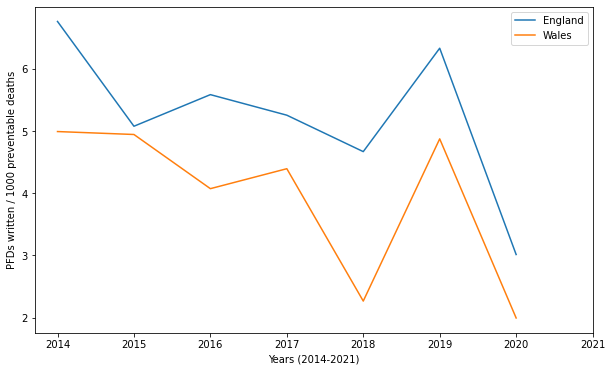

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(en_wa['Years'], en_wa['England ratio (/1000)'], label = 'England')
plt.plot(en_wa['Years'], en_wa['Wales ratio (/1000)'], label = 'Wales')
plt.legend()
plt.xlabel('Years (2014-2021)')
plt.ylabel('PFDs written / 1000 preventable deaths')
plt.xticks(ticks = range(2014, 2022))
plt.savefig('pfd_ons.png')
plt.show()

#Plot ONS preventable deaths data in graph

(rate of x/100,000 in population)

In [ ]:
preventable_df = preventable_df.transpose()

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(10), preventable_df[0], label = 'England')
plt.plot(range(10), preventable_df[3], label = 'Wales')
plt.legend()
plt.xlabel('Years (2013-2022)')
plt.ylabel('Preventable deaths per 100,000')
plt.xticks(ticks = range(10), labels=range(2013, 2023), rotation = 0)
plt.savefig('Preventable_mortality_ons.png')
plt.show()

Find ratio

In [ ]:
print(preventable_df[3].mean())
print(preventable_df[0].mean())

In [ ]:
ratio_mortality = preventable_df[3]/preventable_df[0]

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(range(2013, 2023), ratio_mortality)

In [ ]:
average_ratio_pfd = ratio_mortality.mean()
print(average_ratio_pfd)

# Plot of ratios

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2013, 2023), ratio, label = 'PFD Wales-England ratio')
plt.plot(range(2013, 2023), ratio_mortality, label = 'preventable mortality Wales-England ratio')
plt.legend()

# See if there are less coroners/100,000 population in Wales to see if understaffing is the cause of underreporting

In [ ]:
deaths = pd.read_csv('sent_and_response_4001_corrected_area.csv')
deaths.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
replacements = [['2015-0301', 'Nicola Mundy'], 
                ['2018-0094', 'Rachel Galloway'], 
                ['Jame Bennett', 'James Bennett'], 
                ['Dr Jame Adeley', 'James Adeley'], 
                ['Derek Winters', 'Derek Winter'], 
                ['Dr Peter Dean', 'Peter Dean'], 
                ['Dr Peter dean', 'Peter Dean'], 
                ['ARW Forrest', 'Alexander Forrest'], 
                ['Alexander R W Forrest', 'Alexander Forrest'], 
                ['S Fox', 'Simon Fox'], 
                ['Veronia Hamilton-Deeley', 'Veronica Hamilton-Deeley'], 
                ['D L I Roberts', 'David Roberts'], 
                ['T G Moore', 'Terence Moore'], 
                ['Terence G. Moore', 'Terence Moore'], 
                ['D Hocking', 'Dianne Hocking'], 
                ['D Pritchard Jones', 'Pritchard Jones'], 
                ['L J Hashmi', 'L Hashmi'], 
                ['D Roberts', 'David Roberts'], 
                ['D.Ll. Roberts', 'David Roberts'], 
                ['G A Short', 'Grahame Short'], 
                ['G U Williams', 'Geraint Williams'], 
                ['R Brittain','Richard Brittain' ], 
                ['RN Palmer', 'Roy Palmer'], 
                ['R N Palmer', 'Roy Palmer'],
                ['Jullian Fox', 'Julian Fox'],
                ['S McGovern', 'Sean McGovern'],
                ['S Ormond-Walshe', 'Sarah Ormond-Walshe'],
                ['S P Fisher', 'Stuart Fisher'],
                ['M E Hassell','Mary Hassell' ],
                ['ME Hassell', 'Mary Hassell'],
                ['M E Voisin', 'Maria Voisin'],
                ['M Jennifer Leeming', 'Jennier Leeming'],
                ['M Spittal', 'Murray Spittal'], 
                ['Nicola Jane Mundy','Nicola Mundy' ], 
                ['N J Mundy', 'Nicola Mundy'], 
                ['P Harrowing', 'Peter Harrowing'], 
                ['Jame Adeley', 'James Adeley'], 
                ['J Adeley', 'James Adeley'], 
                ['J Robertson', 'Julia Robertson'], 
                ['L Hashmi', 'Lisa Hashmi'], 
                ['L Tagliavini', 'Lorna Tagliavini'], 
                ['HG Mark Bricknell', 'Hugh Bricknell'], 
                ['PS Cooper', 'Paul Cooper'], 
                ['M A Beresford', 'Mark Beresford'], 
                ['Christopher Willilams', 'Christopher Williams'], 
                ['Rashid Sohall', 'Rashid Sohail'], 
                ['David Hinchcliff', 'David Hinchliff']
                ]
for replacement in replacements: 
  deaths.loc[deaths['coroner_name']==replacement[0], 'coroner_name'] = replacement[1]

In [ ]:
display(deaths.head())

Make new column distinguishing if it's England or Wales

In [ ]:
wales = ['North West Wales', 'Ceredigion', 'Carmarthenshire and Pembrokeshire', 'Swansea and Neath Port Talbot', 'South Wales Central', 'North Wales (East & Central)', 'Gwent']

In [ ]:
deaths['en_wa']=np.nan
for i in deaths.index: 
  if deaths.loc[i, 'corrected_area'] in wales: 
    deaths.loc[i, 'en_wa']= 'Wales'
  else: 
    deaths.loc[i, 'en_wa']= 'England'

In [ ]:
en = deaths[deaths['en_wa']=='England']
wa = deaths[deaths['en_wa']=='Wales']

In [ ]:
coroner_en = en['coroner_name'].nunique()
coroner_wa = wa['coroner_name'].nunique()

433 + 33 > 455 because some coroners work across England and Wales

In [ ]:
en_pop = 56489800 
wa_pop = 3107500

coroner number per 100,000

In [ ]:
en_scaled = coroner_en/en_pop*100000
wa_scaled = coroner_wa/wa_pop*100000

In [ ]:
print(en_scaled)
print(wa_scaled)

# Hypothesis: coroner per area matters? 

In [ ]:
wa_area = 20779
en_area = 130279

In [ ]:
en_coroner_scaled = coroner_en/en_area
wa_coroner_scaled = coroner_wa/wa_area

In [ ]:
print(en_coroner_scaled)
print(wa_coroner_scaled)